# Author: Amrita K

## Data Science and Business Analytics Intern

### The Sparks Foundation 

### GRIP20

This is task 2 of TSF GRIP20 internship wherein K-Means clustering is used to predict the optimum number of clusters and represented visually using the given dataset, Iris.

Technical stack : Numpy, Pandas, Matplotlib, Seaborn and Scikit Learn.

In [26]:
# Importing the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [25]:
# Load the 'Iris' dataset.

iris= datasets.load_iris()
df= pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.shape

(150, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Correlation

In [16]:
corr_df = df.corr()
corr_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


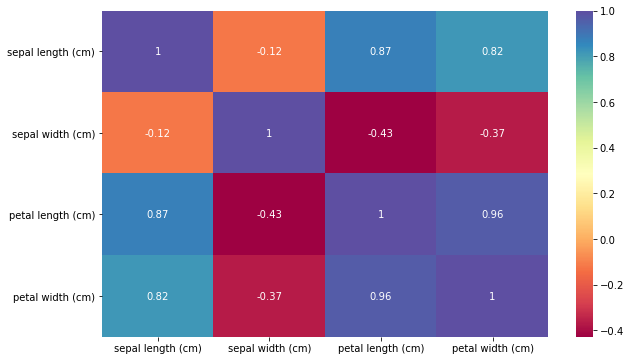

In [18]:
plt.figure(figsize= [10,6])
sns.heatmap(corr_df, cmap='Spectral', annot=True)

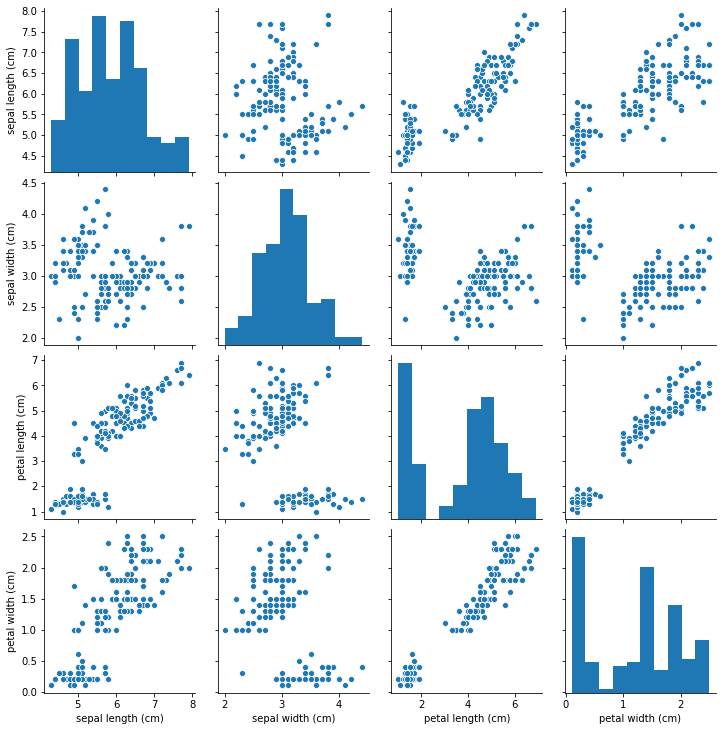

In [19]:
sns.pairplot(df)

# Finding the optimum number of clusters using K-Means.


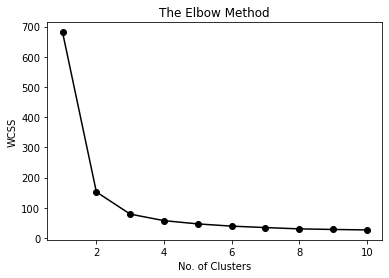

In [20]:
x= df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss= []

for i in range(1,11):
    kmeans= KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
 
plt.plot(range(1,11), wcss, color= 'k', marker= 'o')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph because the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we can choose the number of clusters as 3.

In [24]:
# Applying kmeans to the dataset / Creating the kmeans classifier.

kmeans= KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans= kmeans.fit_predict(x)

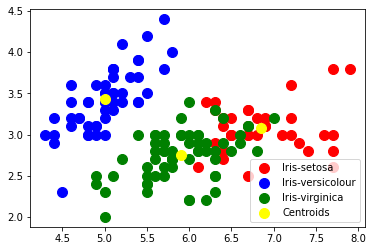

In [22]:
# Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeans== 0,0], x[y_kmeans== 0,1], s= 100, c='red', label= 'Iris-setosa')
plt.scatter(x[y_kmeans== 1,0], x[y_kmeans== 1,1], s= 100, c='blue', label= 'Iris-versicolour')
plt.scatter(x[y_kmeans== 2,0], x[y_kmeans== 2,1], s= 100, c='green', label= 'Iris-virginica')

# Plotting the centroids of the clusters.

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# Conclusion


I could successfully complete the Prediction Using Unsupervised ML task and could find the optimum number of clusters for K Means and determine the value of k alongwith the visualisation of clusters. Thank you!